##Set up environment

In [ ]:
# !pip install scipy.stats 
# !pip install datetime
# !pip install numpy
# !pip install pandas
# !pip install matplotlib.pyplot
# !pip install yfinance
# !pip install statistics
# !pip install pandas_datareader

In [17]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date, timedelta
import datetime as dt
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
import statistics

##Input Box

In [22]:
#Here are all the variables that need to be inputted
stock_list='SPY'
stock_price_t_call=176
stock_price_t1_call=178
#- select n numbers of underlying stock ticker here
#- e.g. TSLA is the stock ticker symbol for Tesla, Inc., and APPL is the the stock ticker symbol for Apple, Inc....
#- stock ticker symbol can be searched on Stock Market Websites: Yahoo Finance (finance.yahoo.com), Google Finance (google.com/finance), or Bloomberg (bloomberg.com), allow investors to search for a company and provide its ticker symbol along with other financial data.

strike_price = 175
#- enter strike price of option here, the number of elements in strike_price should match that in stock_list
#- e.g. the strike price of Tesla's option is 360, that of Apple's option is 440...
#- the format is [strike price 1, strike price 2, strike price 3, ..., strike price n ], notice that there's no '' here in the []

stock_price_t_stock = 430
stock_price_t1_stock = 432
#- select a stock that is included in the portfolio

r = 0.05   #enter riskfree rate, 

T = 252 #enter expiration date here (calculated in days)

N = 100 #number of steps within each simulation

i = 1000 #number of simulations

stock_weight = 0.3
#- select the weight of stock

option_weight = 0.7
#- e.g. the weight of Tesla's call with strike_price of 155 is 0.2, the weight of Tesla's call with strike_price of 157 is 0.3...
#- the format is [weight 1, weight 2, weight 3,..., weight n], notice that there's no '' here in the []


##Calculate Sigma

In [23]:

#define a function named get_data: 
#- downlaod the Close price of one stock from one year ago to current date.
#- Close price: It is the final price at which the stock was traded before the market closes for the day.
def get_data(stock):
    # Retrieve stock data
    today = datetime.now() 
    one_year_ago = today.replace(year=today.year-1)
    yf.pdr_override()
    df = yf.download(stock, start=one_year_ago, end=today)
    df = df.sort_values(by="Date")
    df = df.dropna()
    df = df.assign(close_day_before=df.Close.shift(1))
    return df
    
#define a function named calculate_sigma: 
#- calculate the annualized volatility of stock by:
#- calculate the daily logarithmic return 
#- calculates the standard deviation of the daily returns 

def calculate_sigma(stock_t,stock_t1):
    returns = np.log(stock_t) - np.log(stock_t1)
    print(returns)
    sigma = returns.std()
    return sigma
# print(get_data(stock_list))
#execute function calculate_sigma:
#- print the sigma in for each stock in stock_list
calculate_sigma(stock_price_t_call,stock_price_t1_call)
# sigma = calculate_sigma(stock_price_t_call,stock_price_t1_call)
# # print(f"Stock: {stock_list}, daily sigma: {sigma}")
# print(f"daily sigma: {sigma}")

-0.011299555253933669


0.0

In [24]:
#calculate the volatility of stock


#define a function named get_data: 
#- downlaod the Close price of one stock from one year ago to current date.
#- Close price: It is the final price at which the stock was traded before the market closes for the day.
def get_data(stock):
    # Retrieve stock data

    today = datetime.now() - timedelta(days = 3)
    one_year_ago = today.replace(year=today.year-1)
    print(today)
    yf.pdr_override()
    df = yf.download(stock, start=one_year_ago, end=today)
    df = df.sort_values(by="Date")
    df = df.dropna()
    df = df.assign(close_day_before=df.Close.shift(1))
    return df
get_data(stock_list)

#define a function named calculate_sigma: 
#- calculate the annualized volatility of stock by:
#- calculate the daily logarithmic return 
#- calculates the standard deviation of the daily returns 

def calculate_sigma(stock):
    df = get_data(stock)
    df['returns'] = np.log(df.Close) - np.log(df.close_day_before)
    print(df['returns'])
    sigma = df['returns'].std()
    return sigma
# print(get_data(stock_list))
#execute function calculate_sigma:
#- print the sigma in for each stock in stock_list
calculate_sigma(stock_list)

# sigma = calculate_sigma(stock_list)
# print(f"Stock: {stock_list}, daily sigma: {sigma}")

2023-05-18 11:20:50.555654
[*********************100%***********************]  1 of 1 completed
2023-05-18 11:20:50.799601
[*********************100%***********************]  1 of 1 completed
Date
2022-05-18         NaN
2022-05-19   -0.006143
2022-05-20    0.000436
2022-05-23    0.018537
2022-05-24   -0.007663
                ...   
2023-05-12   -0.001311
2023-05-15    0.003444
2023-05-16   -0.006705
2023-05-17    0.012066
2023-05-18    0.009587
Name: returns, Length: 252, dtype: float64


0.013418397175248106

In [8]:
# calculate stock_in_portfolio sigma
sigma_portfolio = calculate_sigma(stock_in_portfolio)
print(f"Stock: {stock_in_portfolio}, daily sigma: {sigma_portfolio}")

[*********************100%***********************]  1 of 1 completed
Stock: GOOG, daily sigma: 0.024341831510608317


##Simulate Stock Price

In [29]:
#define a function named geometric_brownian: performs a Monte Carlo simulation to generate multiple paths of simulated stock prices using the geometric Brownian motion model
#- create 1 empty array "S", with 2 dimensions [i, N]  to store the simulated stock prices. （i and N are defined in the input box）
#- for y in range (0,i-1): the code enters a loop that iterates i-1 times, i-1 represents the number of simulations to be performed.
#- Within the loop, the initial stock price, S0 is set for each simulation. e.g. S[0,0]=S[1,0]=...S[i-1,0]=S0
#- it generates i-1 market senarios
#- for x in range (0,N-1): the code enters a loop that iterates N-1 times, N-1 represents the number of time steps.
#- Within the loop, it calculates the stock price at each time step using the geometric Brownian motion equation
#- store calculated stock prices in the "S" array

def geometric_brownian(S0,sigma):
    T1=int(T.get())
    N1=N.get()
    r1=r.get()
    i1=i.get()
    simulation_count=i1
    # matrix store the results
    S = np.zeros([T1, simulation_count])
    print(S)
    S0_matrix = np.ones(simulation_count) * S0
    u = r1 / 252
    delta_t = 1 / N1 # each step takes 1/N day

    # run simulation N times a day for T days, totally N * T
    for y in range(N1 * T1):
        S0_matrix *= np.exp((u - sigma**2 / 2) * delta_t + sigma * delta_t * np.random.normal(0, 1, size=[simulation_count]))
        if (y + 1) % N1 == 0: # end of day
            S[y // N1, :] = S0_matrix
    print(S)
    return S

#define a function named plot: 
#- plot the process of Monte Carlo simulation
def plot(stock, T, r):
    df = get_data(stock)
    S0 = df.iloc[-1]['Close'] #initial stock price = current Close price 
    sigma = calculate_sigma(stock)
    S = geometric_brownian(S0, sigma)
    t = range(1, T+1, 1)
    plt.plot(t, S)
    plt.title('Stock %s Days %d Sigma %.2f r %.2f S0 %.2f' % (stock, T, sigma, r, S0))
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.show()

#execute function get_data, calculate_sigma, geometric_brownian:
#- print the result of monte carlo simulation for every stock in stock_list
#- e.g. The 1st picture is the predicted stock price of Tesla, the 2nd one is that of Apple...

def get_stock_T(stock_list,i, T, N, r):
    
    df = get_data(stock_list)
    S0 = df.iloc[-1]['Close'] #initial stock price = current Close price 
    sigma = calculate_sigma(stock_list)
    S = geometric_brownian(S0,sigma)
    stock_0 = S0
    stock_T = np.array(S[-1, :], dtype=np.float16) # stock price at the end of day T
    return stock_T

# stock_T1 = get_stock_T(stock_list,i,S0, T, N, r).transpose()
# print(stock_T1)


        
stock_T1=get_stock_T(stock_list,i, T, N, r)        
plot(stock_list,T,r)


2023-05-18 11:54:08.462658
[*********************100%***********************]  1 of 1 completed
2023-05-18 11:54:08.719746
[*********************100%***********************]  1 of 1 completed
Date
2022-05-18         NaN
2022-05-19   -0.006143
2022-05-20    0.000436
2022-05-23    0.018537
2022-05-24   -0.007663
                ...   
2023-05-12   -0.001311
2023-05-15    0.003444
2023-05-16   -0.006705
2023-05-17    0.012066
2023-05-18    0.009587
Name: returns, Length: 252, dtype: float64


AttributeError: 'int' object has no attribute 'get'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


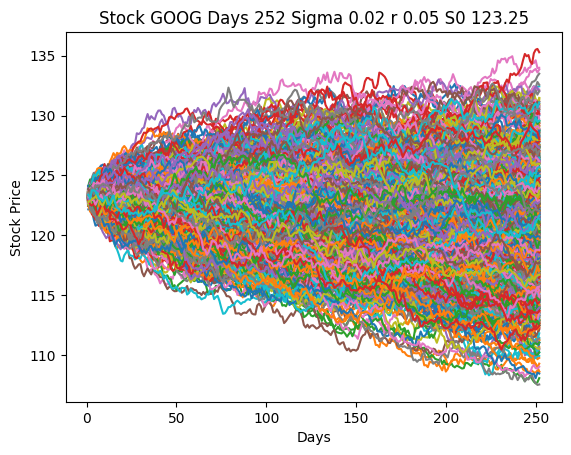

In [22]:


plot(stock_in_portfolio,T,r)


##Get the option price

In [29]:
# define a function named call:
#- create a 1-dimensional array with i-1 elements to store call price
#- calculate call price by maxmize: (a) stock price in the (N-1)th steps (S[y, N-1]) minus the strike price(K), and (b) zero.
def call(St, strike_price):
    return np.maximum(St - strike_price, 0)

# Calculate the value of the portofolio.
#   stock_price: 1 * i 
def calc_portfolio_value(stock_weight, stock_price, option_weight, option_price, r, T, dim=2):
    axis_val = 1 if dim == 2 else 0
    price_sum = stock_weight * stock_price + option_weight * option_price
    return price_sum / np.exp(r * T / 365)


##Calculate portfolio return and VaR

In [33]:
def portfolio_value(stock_list,stock_in_portfolio,i,T, N, r, stock_weight,option_weight,strike_price):
    call_df = get_data(stock_list)
    call_S0 = call_df.iloc[-1]['Close'] #initial stock price = current Close price 
    stock_0 = call_S0
    stock_df= get_data(stock_in_portfolio)
    stock_S0 = stock_df.iloc[-1]['Close']
    stock_T = get_stock_T(stock_list,i,T, N, r)
    call_T = call(stock_T, strike_price)
    stock_price_T = get_stock_T(stock_in_portfolio,i, T, N, r)
    portfolio_value_T = calc_portfolio_value(stock_weight, stock_price_T, option_weight, call_T, r, T)   
    call_0 = call(stock_0, strike_price)
    stock_price_0 = stock_S0
    print(f"Call value at T = 0 is {call_0}")
    # calculate 
    portfolio_value_0 = calc_portfolio_value(stock_weight, stock_price_0, option_weight, call_0, r, T, dim=1)
    print(f"The portfolio value at T = 0 is {portfolio_value_0}")
    # calculate the portfolio return
    portfolio_return = portfolio_value_T / portfolio_value_0 - 1
    avg_portfolio_return = np.average(portfolio_return)
    print(f"The average portfolio return is {avg_portfolio_return}")
    # calculate VaR
    portfolio_return = np.sort(portfolio_return)
    value_at_risk = portfolio_return[int(0.05 * i)]       
    print(f"VaR of the portfolio at {0.05 * 100}% confidence level: {value_at_risk}")
    print('$Amount required to cover minimum losses for one day is ' + str(portfolio_value_0* - np.percentile(portfolio_return,5)))

    
portfolio_value(stock_list,stock_in_portfolio,i,T, N, r, stock_weight,option_weight,strike_price)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Call value at T = 0 is 0.160003662109375
The portfolio value at T = 0 is 35.82858451914246
The average portfolio return is 0.0158538818359375
VaR of the portfolio at 5.0% confidence level: -0.0712890625
$Amount required to cover minimum losses for one day is 2.5541862010716794
